Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560655 entries, 0 to 560654
Data columns (total 13 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   0                                           560655 non-null  int64  
 1   Electricity:Facility [kW](Hourly)           560655 non-null  float64
 2   Fans:Electricity [kW](Hourly)               560655 non-null  float64
 3   Cooling:Electricity [kW](Hourly)            560655 non-null  float64
 4   Heating:Electricity [kW](Hourly)            560655 non-null  float64
 5   InteriorLights:Electricity [kW](Hourly)     560655 non-null  float64
 6   InteriorEquipment:Electricity [kW](Hourly)  560655 non-null  float64
 7   Gas:Facility [kW](Hourly)                   560655 non-null  float64
 8   Heating:Gas [kW](Hourly)                    560655 non-null  float64
 9   InteriorEquipment:Gas [kW](Hourly)          560655 non-n

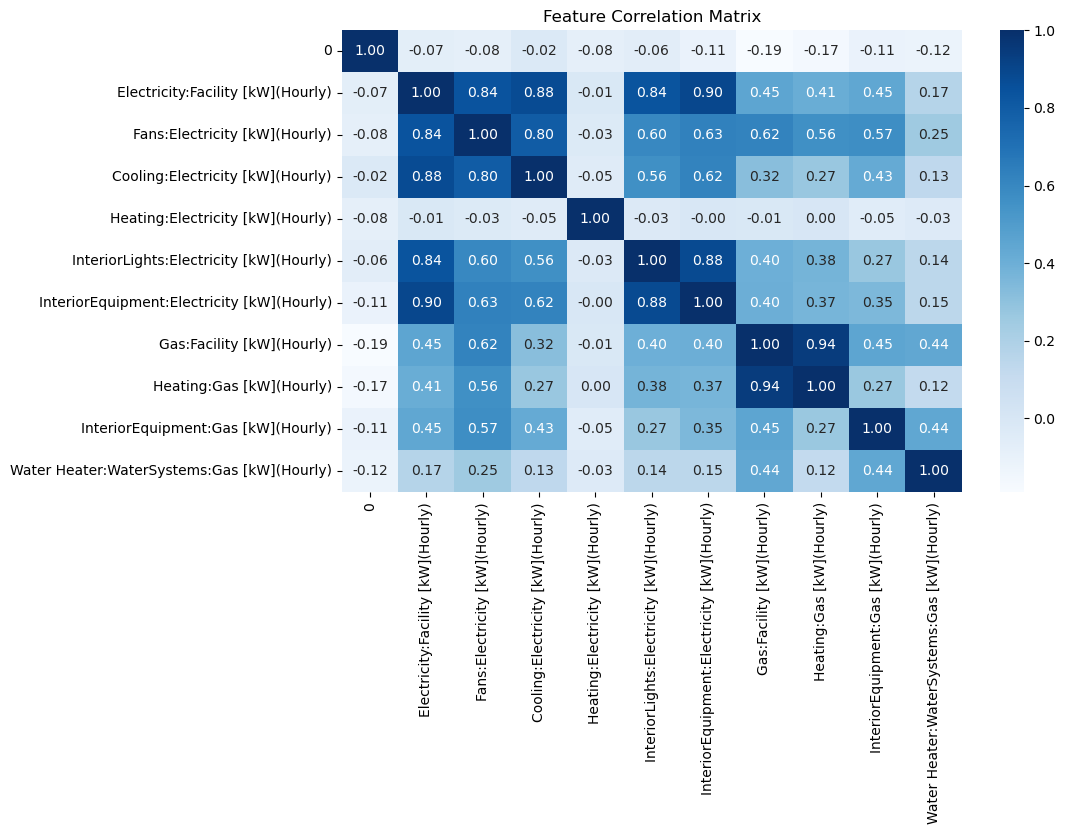

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree



file_path = "df.csv"  
df = pd.read_csv(file_path)


print("Dataset Info:")
print(df.info())


print("\nFirst 5 rows of the dataset:")
print(df.head())


print("\nSummary Statistics:")
print(df.describe())


print("\nMissing Values:")
print(df.isnull().sum())


plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


Accuracy: 0.6833703436159492

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85     66365
           1       0.37      0.29      0.33     10216
           2       1.00      1.00      1.00      4595
           3       0.38      0.33      0.35      8870
           4       0.50      0.72      0.59      8292
           5       0.36      0.86      0.51      6710
           6       0.11      0.04      0.05      7083

    accuracy                           0.68    112131
   macro avg       0.51      0.58      0.53    112131
weighted avg       0.69      0.68      0.68    112131



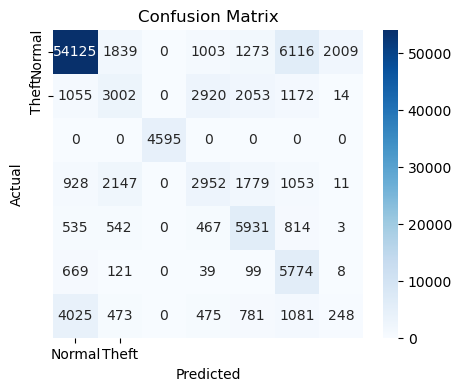

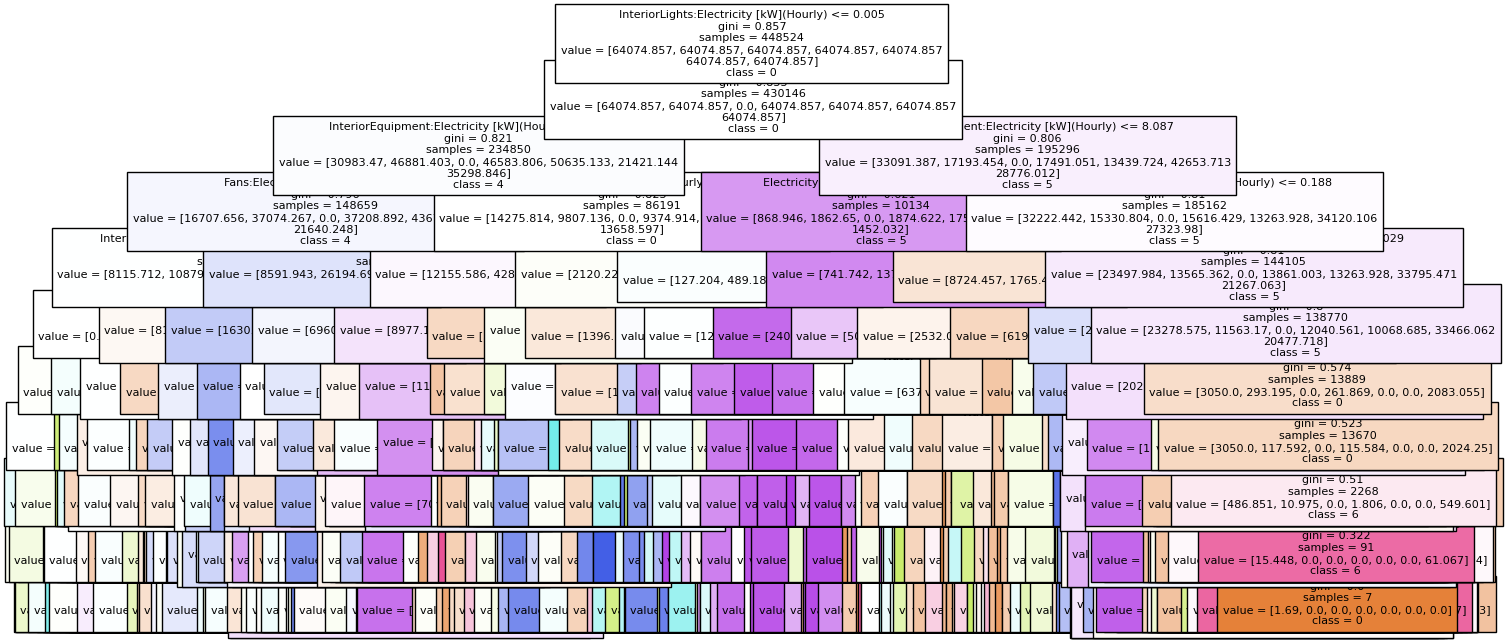

In [12]:
# Encode categorical target variable
label_enc = LabelEncoder()
df["theft"] = label_enc.fit_transform(df["theft"])  # Convert 'Normal'/'Theft' to 0/1

# Select numerical features and target variable
X = df.select_dtypes(include=['number']).drop(columns=["0", "theft"])  # Drop index column
y = df["theft"]

# Stratified Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train a simple Decision Tree Classifier
clf = DecisionTreeClassifier(class_weight="balanced", max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Theft"], yticklabels=["Normal", "Theft"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot Decision Tree
plt.figure(figsize=(15, 8))
class_names = list(map(str, clf.classes_))  # Convert to strings if needed
plot_tree(clf, filled=True, feature_names=X.columns, class_names=class_names, fontsize=8)
plt.show()
